# Google Maps Review Analyzer

The main functions are:

`get_place_id`: Fetches the Place ID using Google Places API.
`get_reviews`: Fetches reviews for the given Place ID.
`analyze_reviews`: Analyzes reviews for sentiment and word frequency.
`create_wordcloud`: Creates a word cloud from word frequencies.

In [ ]:
import requests
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime as dt

API_KEY = "Your Google API Key"

def get_place_id(place_name):
    """Fetch Place ID using Google Places API."""
    url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
    params = {
        "input": place_name,
        "inputtype": "textquery",
        "fields": "place_id",
        "key": API_KEY
    }
    response = requests.get(url, params=params).json()
    return response['candidates'][0]['place_id']

def get_reviews(place_id, review_sort="most_relevant",verbose=False):
    """Fetch reviews for the given Place ID and print the status."""
    url = "https://maps.googleapis.com/maps/api/place/details/json"
    params = {
        "place_id": place_id,
        "fields": "name,rating,reviews",
        "reviews_sort": review_sort,
        "key": API_KEY
    }
    response = requests.get(url, params=params).json()
    
    # Print general details
    print(f"Place Details Status: {response.get('status')}")
    print(f"Place Name: {response['result'].get('name')}")
    print(f"Place Rating: {response['result'].get('rating')}")

    reviews = response['result'].get('reviews', [])

    # Print verbose output if enabled
    if verbose:
        print("\nReviews:")
        for review in reviews:
            text = review.get('text', 'No text available')
            if len(text) == 0:
                text = "No review text available"
            timestamp = dt.fromtimestamp(review['time']).strftime('%Y-%m-%d')
            print(f"\nDate: {timestamp}")
            print(f"Review: {text}")
    
    return reviews

def analyze_reviews(reviews):
    """Analyze reviews for sentiment and word frequency."""
    sentiments = []
    all_words = []
    
    for review in reviews:
        text = review.get('text', '')
        sentiment = TextBlob(text).sentiment.polarity
        sentiments.append(sentiment)
        all_words.extend(text.split())
    
    return sentiments, Counter(all_words)

def create_wordcloud(word_counts):
    """Create a word cloud from word frequencies."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Get reviews

In [61]:
place_name = "Kiltro Restobar Barcelona Gracia"

place_id = get_place_id(place_name)
#place_id = "ChIJg_N18-OWpBIRe8y275ChIYM"
reviews = get_reviews(place_id, review_sort = "most_relevant", verbose = False)

Place Details Status: OK
Place Name: KILTRO Restobar - Gracia
Place Rating: 4.8


Analyze Reviews

Average Sentiment: 0.34
Positive Reviews: 4
Negative Reviews: 1


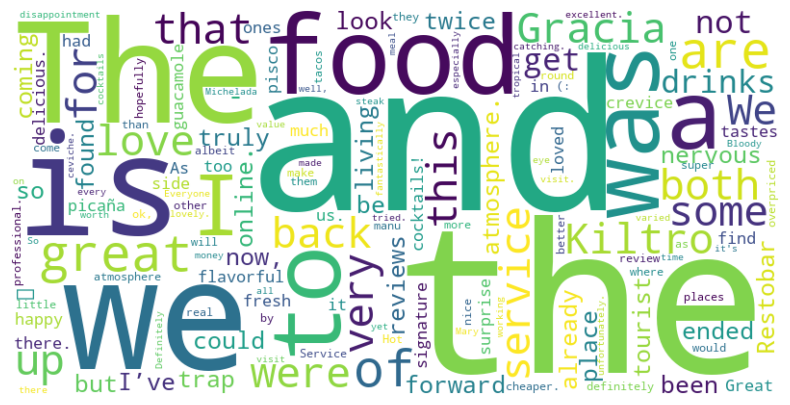

In [62]:
if reviews:
    sentiments, word_counts = analyze_reviews(reviews)

    print(f"Average Sentiment: {sum(sentiments)/len(sentiments):.2f}")
    print(f"Positive Reviews: {sum(1 for s in sentiments if s > 0)}")
    print(f"Negative Reviews: {sum(1 for s in sentiments if s < 0)}")
    
    create_wordcloud(word_counts)
else:
    print("No reviews found.")